In [67]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [68]:
penguins = penguins.dropna()

## Clustering: K-means

In [69]:
from sklearn.cluster import KMeans

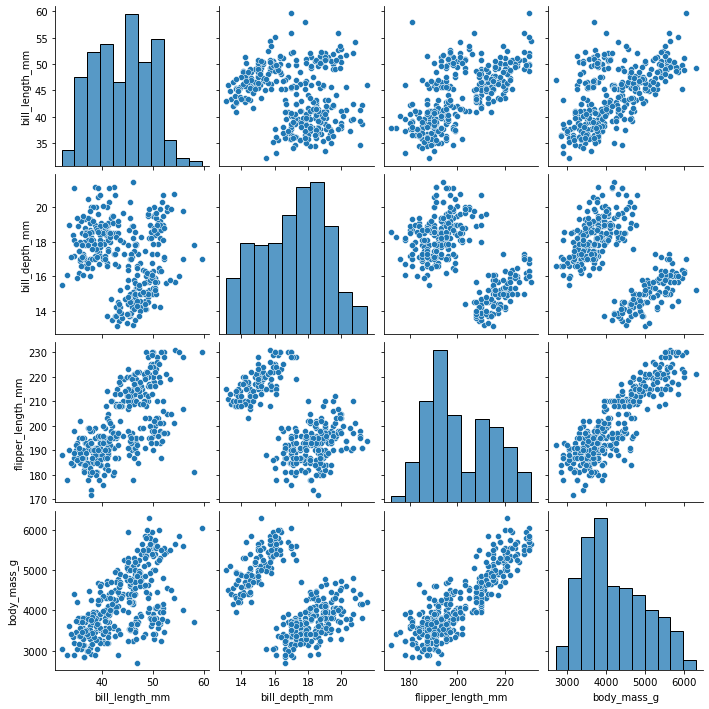

In [70]:
sns.pairplot(penguins)

We can say for sure that at least 2 clusters exist. Bill depth vs body mass is certainly divided into two groups. Also flipper length versus bill depth is very much seperated from each other but we don't know if those are the same two clusters or different ones. So we can visually say at least two clusters exist.

In [71]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=39).fit(penguins[features])

In [72]:
penguins['cluster'] = km.predict(penguins[features])
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  cluster  
0       3750.0    Male        0  
1       3800.0  Female        0  
2       3250.0  Female        0  
4       3450.0  Female        0  
5       3650.0    Male        0

In [73]:
penguins.cluster.value_counts()

0    203
1    130
Name: cluster, dtype: int64

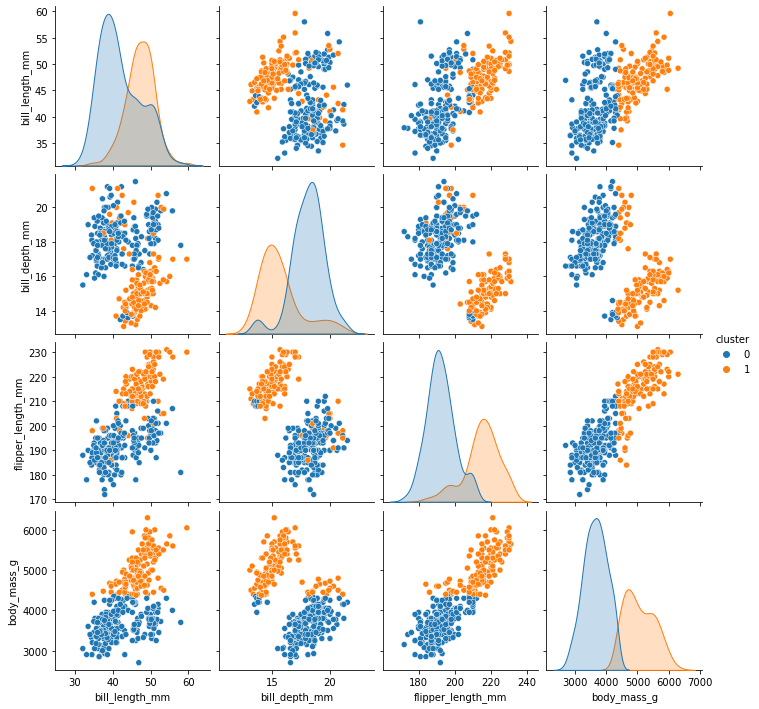

In [74]:
sns.pairplot(penguins, hue="cluster")

## Evaluating the model

In [75]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [76]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

In [77]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster      0    1
species            
Adelie     132   14
Chinstrap   63    5
Gentoo       8  111

This contingency table shows us that cluster one primarily exists of Adelie and chinstrap penguins while the other cluster is mostly Gentoo penguins this proves that Adelie and Chinstrap penguins have more in common than Gentoo penguins.